In [1]:
#importing modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#importing digit dataset

from keras.datasets import mnist
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

In [3]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#reducing size of mnist data set
x_train1 = x_train1[:15000]
y_train1 = y_train1[:15000]
x_test1 = x_test1[:2000]
y_test1 = y_test1[:2000]

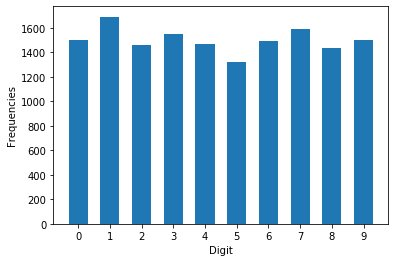

In [5]:
(number,count) = np.unique(y_train1,return_counts = True)
plt.xticks(number)
plt.bar(number,count,width = 0.6)
plt.xlabel("Digit")
plt.ylabel("Frequencies")
plt.show()

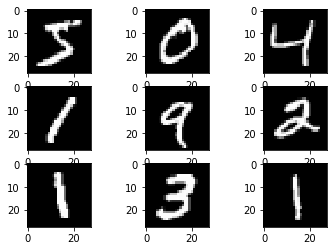

In [6]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train1[i], cmap=plt.cm.gray)

In [7]:
print(x_train1[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
#importing alphabet data set
data = pd.read_csv("A_Z Handwirtten DataSet.csv")
print(data.shape)

(28600, 785)


In [9]:
print(data.head())

    0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0   8    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1   5    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2   7    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   3    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  14    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [10]:
#Split data into images and their labels:

X = data.drop('0',axis = 1)        #contains images
Y = data['0']                      #contains label

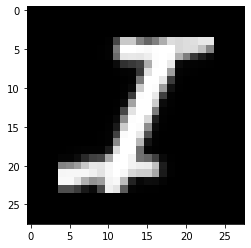

In [11]:
#displaying first alphabet
x = np.array(X.head(1))
x = np.reshape(x,(28,28))
plt.imshow(x, cmap=plt.cm.gray)

In [12]:
#train_test data for letter dataset

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, train_size=0.7)

In [13]:
#convert into array
x_train2 = np.array(x_train2)
y_train2 = np.array(y_train2)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

In [14]:
#normalizing pixel value between 0 and 1

#digit data
x_train1 = x_train1/255.0 
x_test1 =  x_test1/255.0

#letter data
x_train2 = x_train2/255.0 
x_test2 =  x_test2/255.0

In [15]:
#resizing the image to input it into convolution layer

#digit data
x_train1 = np.array(x_train1).reshape(-1,28,28,1)
x_test1 = np.array(x_test1).reshape(-1,28,28,1)

#alphabet data
x_train2 = np.array(x_train2).reshape(-1,28,28,1)
x_test2 = np.array(x_test2).reshape(-1,28,28,1)

In [16]:
#increasing value by 10 to diffrentiate digit value and letter values
y_train2 = y_train2 + 10
y_test2 = y_test2 + 10

#concatinating train test data
x_train = np.concatenate((x_train1, x_train2), axis=0)
x_test = np.concatenate((x_test1, x_test2), axis=0)
y_train = np.concatenate((y_train1, y_train2), axis=0)
y_test = np.concatenate((y_test1, y_test2), axis=0)

In [56]:
#designing neural network

from tensorflow.keras import models,layers
model = models.Sequential()
# 1 convolutional layer
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))          

#2 convolutional layer
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
          
#3 convolutional layer
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

#4 convolutional layer
model.add(layers.Conv2D(128,(3,3), activation = 'relu',padding="same"))
model.add(layers.MaxPooling2D((2,2),padding="same"))
model.add(layers.Dropout(0.4))

# dense layer

model.add(layers.Flatten())
model.add(layers.Dense(100 ,activation = 'relu')) 
model.add(layers.Dropout(0.4))  
model.add(layers.Dense(36 ,activation = 'softmax'))

          




In [57]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 1, 1, 64)       

In [58]:
model.compile(optimizer='adam', loss = "SparseCategoricalCrossentropy" ,metrics=['accuracy'])

In [59]:
history = model.fit(x_train,y_train,epochs = 10,validation_data=(x_test, y_test))

Epoch 1/10
1095/1095 [==============================] - 20s 18ms/step - loss: 1.7359 - accuracy: 0.4822 - val_loss: 0.7632 - val_accuracy: 0.7646
Epoch 2/10
1095/1095 [==============================] - 23s 21ms/step - loss: 0.7345 - accuracy: 0.7745 - val_loss: 0.4328 - val_accuracy: 0.8566
Epoch 3/10
1095/1095 [==============================] - 26s 24ms/step - loss: 0.5323 - accuracy: 0.8397 - val_loss: 0.3583 - val_accuracy: 0.8925
Epoch 4/10
1095/1095 [==============================] - 31s 28ms/step - loss: 0.4323 - accuracy: 0.8662 - val_loss: 0.3038 - val_accuracy: 0.9056
Epoch 5/10
1095/1095 [==============================] - 34s 31ms/step - loss: 0.3762 - accuracy: 0.8852 - val_loss: 0.2920 - val_accuracy: 0.91440s - loss: 0.3757 - accu
Epoch 6/10
1095/1095 [==============================] - 33s 30ms/step - loss: 0.3400 - accuracy: 0.8921 - val_loss: 0.2815 - val_accuracy: 0.9054
Epoch 7/10
1095/1095 [==============================] - 34s 31ms/step - loss: 0.3099 - accuracy: 0.9

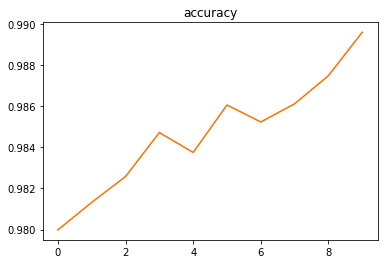

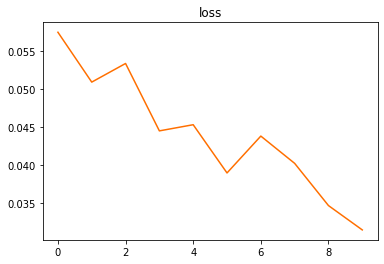

In [34]:
def plot_metric(metric):
    plt.plot(range(10), history.history[metric], color="#FF6F00")
    plt.title(metric)
    plt.show()  
plot_metric("accuracy")
plot_metric("loss")

In [74]:
import cv2

img = cv2.imread('img.png')

type(img)
img = np.array(img)

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28),interpolation = cv2.INTER_AREA)

img = img.reshape(1,28,28,1)
img = img/255.0

value = np.argmax(model.predict(img))
if(value>9):
    print(chr(value+55))
else:
    print(value)

B


In [35]:
import tkinter as tk
import win32gui
from PIL import ImageGrab,Image
import tkinter.messagebox

def clear():
    canvas.delete("all")

def predict():
    x0 = canvas.winfo_rootx() + 8
    y0 = canvas.winfo_rooty() + 3
    x1 = x0 + 425
    y1 = y0 + 470

    img = ImageGrab.grab((x0, y0, x1, y1))
    img = img.resize((28, 28)).convert("L")
    img = np.array(img)
    img = img.reshape((1, 28, 28, 1))
    img = img / 255.0
    
    value = np.argmax(model.predict(img))
    if(value>9):
        tkinter.messagebox.showinfo("Prediction", "it's a " + str(chr(value+55)))
    else:
        tkinter.messagebox.showinfo("Prediction", "it's a " + str(value))

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw(event):
    global lasx, lasy
    canvas.create_oval((lasx, lasy, event.x, event.y), 
                      fill='white', outline='white', 
                      width=15)
    lasx, lasy = event.x, event.y


In [37]:
window = Tk()
window.geometry("350x400+1+1")
window.title("Character Recognization.")

canvas = Canvas(window, bg='black',height="370",width="340")
canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw)

button_frame = tk.Frame(window)
clear_button = tk.Button(button_frame, text="Clear", command=clear)
predict_button = tk.Button(button_frame, text="Predict", command=predict)

canvas.pack(expand= FALSE)
clear_button.pack(side="left")
predict_button.pack(side="right")
button_frame.pack(side = "bottom")

window.mainloop()